# The Dynamic Typing Interlude

So far, we’ve been using variables without declaring their existence or their types, and it somehow works. When we type ``a = 3`` in an interactive session or program file, for instance, how does Python know that ``a`` should stand for an integer? For that matter, how does Python know what ``a`` is at all?

Once you start asking such questions, you’ve crossed over into the domain of Python’s dynamic typing model. In Python, types are determined automatically at runtime, not in response to declarations in your code. 

For example, when we say this to assign a variable a value:

In [1]:
a = 3 # Assign a name to an object

at least conceptually, Python will perform three distinct steps to carry out the request.
These steps reflect the operation of all assignments in the Python language:
1. Create an object to represent the value 3.
2. Create the variable ``a``, if it does not yet exist. 
3. Link the variable ``a`` to the new object 3.

The net result will be a structure inside Python that resembles the following figure:

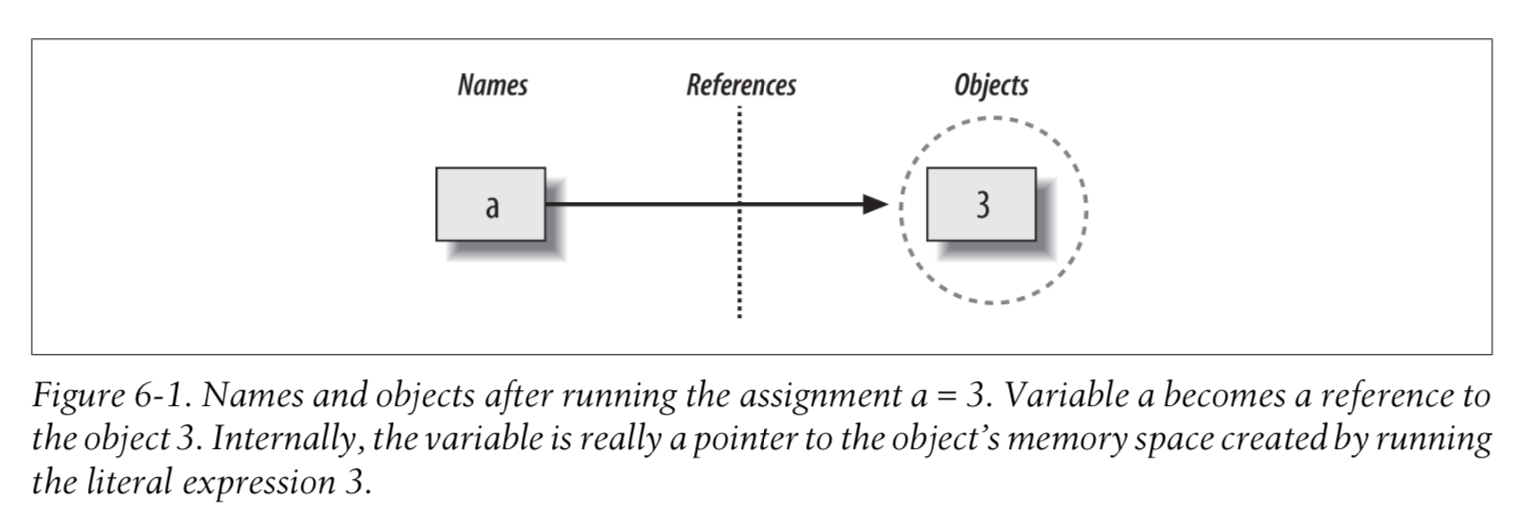

## Types Live with Objects, Not Variables

In [2]:
a = 3 # it is an integer

In [3]:
a = "spam" # it is a string

In [4]:
a = 1.23 # now it is a floating point

Names have no types; as stated earlier, types live with objects, not names. In the preceding listing, we’ve simply changed ``a`` to reference different objects. Objects, on the other hand, know what type they are—each object contains a header field that tags the object with its type. The integer object 3, for example, will contain the value 3, plus a designator that tells Python that the object is an integer.

In [5]:
a

1.23

## Objects Are Garbage-Collected

When we reassign a variable, what happens to the value it was previously referencing? For example, after the following statements, what happens to the object 3?

In [6]:
a = 3

In [7]:
a = "spam"

The answer is that in Python, whenever a name is assigned to a new object, the space held by the prior object is reclaimed if it is not referenced by any other name or object - that is, the object’s space is automatically thrown back into the free space pool, to be reused for a future object. This automatic reclamation of objects’ space is known as *garbage collection*.

The most immediately tangible benefit of garbage collection is that it means you can use objects liberally without ever needing to allocate or free up space in your script. Python will clean up unused space for you as your program runs. 

## Shared References

In [8]:
a = 3

In [9]:
b = a

Typing these two statements generates the scene captured in the following figure:

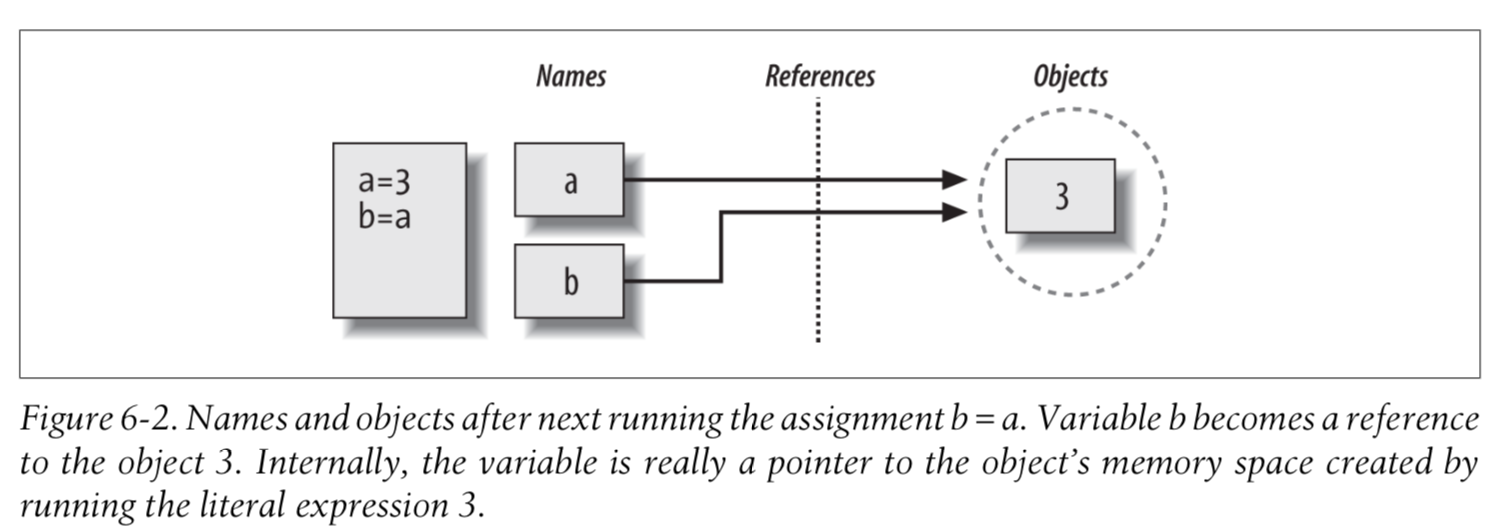

In [10]:
b

3

This scenario in Python—with multiple names referencing the same object—is usually called a *shared reference*.

In [11]:
# suppose we extend the session with one more statement:
a = 3
b = a
a = "spam"

In [12]:
b

3

The resulting reference structure is shown in the following figure:

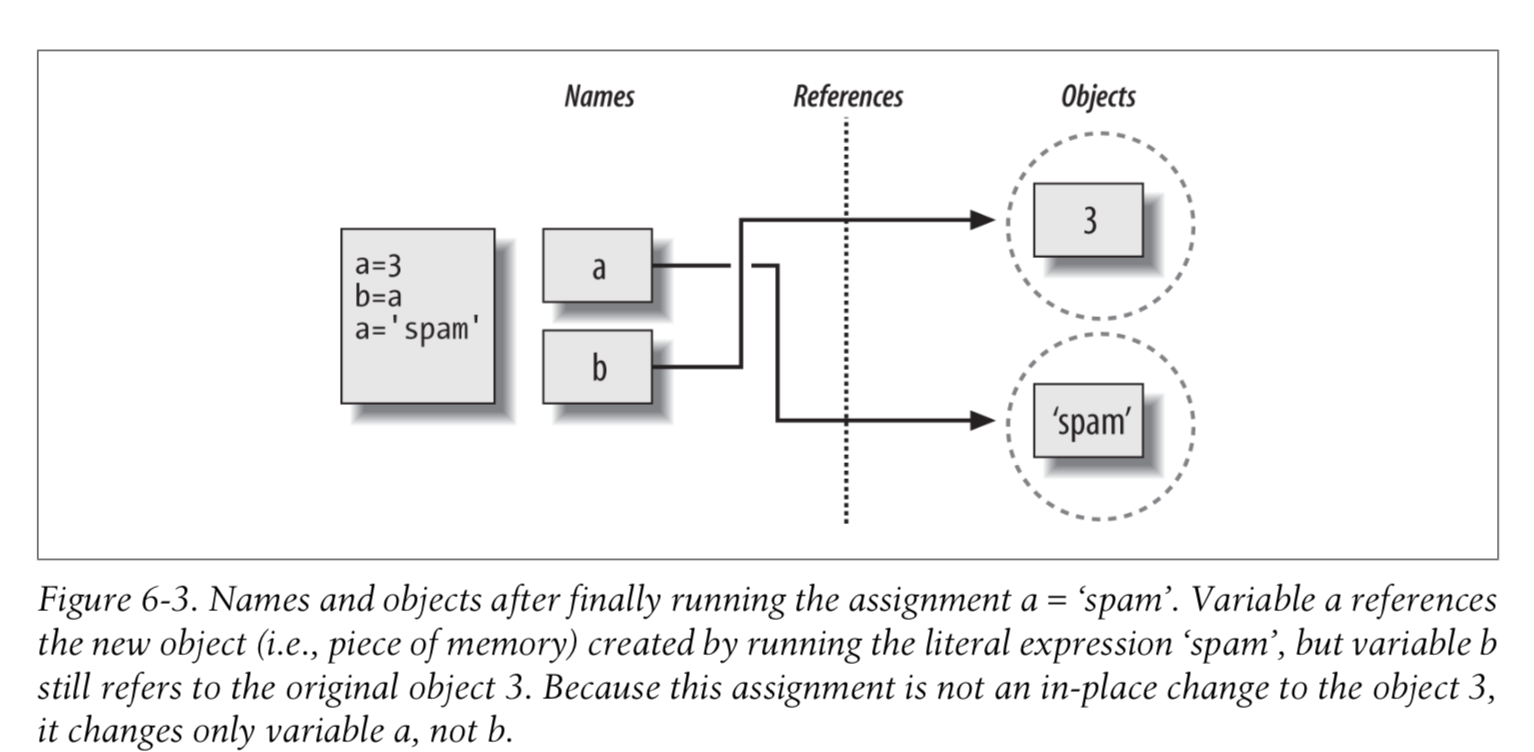

In [13]:
b = a
print(b)

spam


## Shared References and In-Place Changes

There are objects and operations that perform in-place object changes—Python’s mutable types, including lists, dictionaries, and sets.

For objects that support such in-place changes, you need to be more aware of shared references, since a change from one name may impact others. Otherwise, your objects may seem to change for no apparent reason.

In [14]:
# A mutable object
L1 = [2, 3, 4]

In [15]:
# Make a reference to the same object
L2 = L1

In [16]:
id(L1), id(L2)

(2405894784704, 2405894784704)

In [17]:
# An in-place change
L1[0] = 24

In [18]:
# L1 is different
L1

[24, 3, 4]

In [19]:
L2

[24, 3, 4]

Really, we haven’t changed L1 itself here; we’ve changed a component of the object that L1 references. This sort of change overwrites part of the list object’s value in place. Because the list object is shared by (referenced from) other variables, though, an in- place change like this doesn’t affect only L1. In this example, the effect shows up in L2 as well because it references the same object as L1. Again, we haven’t actually changed L2, either, but its value will appear different because it refers to an object that has been overwritten in place.

It’s also just the default: if you don’t want such behavior, you can request that Python copy objects instead of making references. There are a variety of ways to copy a list, including using the built-in list function and the standard library copy module. Perhaps the most common way is to slice from start to finish.

In [20]:
L1 = [2, 3, 4]

In [21]:
# Make a copy of L1 (or list(L1), copy.copy(L1), etc.)
L2 = L1[:]

In [22]:
L1

[2, 3, 4]

In [23]:
L2

[2, 3, 4]

In [24]:
id(L1)

2405894792192

In [25]:
id(L2)

2405895009792

In [26]:
L1[0] = 24

In [27]:
L1

[24, 3, 4]

In [28]:
L2

[2, 3, 4]

L2 is not changed!

Also, note that the standard library ``copy`` module has a call for copying any object type generically, as well as a call for copying nested object structures—a dictionary with nested lists, for example:

In [29]:
import copy
L1 = [[2, 3, 4], ["a", "b", "c"]]
L2 = copy.copy(L1) # Make top-level "shallow" copy of any object Y
L3 = copy.deepcopy(L1) # Make deep copy of any object Y: copy all nested parts

In [30]:
L1

[[2, 3, 4], ['a', 'b', 'c']]

In [31]:
L2

[[2, 3, 4], ['a', 'b', 'c']]

In [32]:
L3

[[2, 3, 4], ['a', 'b', 'c']]

In [33]:
#lower levels changes are reflected
L1[0][0] = "spam"

In [38]:
L1

[['spam', 3, 4], ['a', 'b', 'c']]

In [41]:
L1.append("hello")

In [42]:
L1

[['spam', 3, 4], ['a', 'b', 'c'], 'hello']

In [44]:
L2 #Only top level is protected 

[['spam', 3, 4], ['a', 'b', 'c']]

In [45]:
#Deep copy creates indpendent 
L3

[[2, 3, 4], ['a', 'b', 'c']]

In [46]:
L1


[['spam', 3, 4], ['a', 'b', 'c'], 'hello']

In [47]:
L1[0] = "5"

In [48]:
L1

['5', ['a', 'b', 'c'], 'hello']

In [49]:
L2

[['spam', 3, 4], ['a', 'b', 'c']]

In [50]:
L3

[[2, 3, 4], ['a', 'b', 'c']]

In [51]:
id(L1)

2405895069504

In [52]:
id(L2)

2405895066368

In [53]:
id(L3)

2405895074368

In [54]:
L1[0] = [2,3,4]

In [55]:
L1

[[2, 3, 4], ['a', 'b', 'c'], 'hello']

In [56]:
L2

[['spam', 3, 4], ['a', 'b', 'c']]

In [57]:
import copy
L1 = [2, 3, 4] #[[2, 3, 4], ["a", "b", "c"]]
L2 = copy.copy(L1) # Make top-level "shallow" copy of any object Y
L3 = copy.deepcopy(L1) # Make deep copy of any object Y: copy all nested parts

In [58]:
L1[0] = 24

In [59]:
L1

[24, 3, 4]

In [60]:
L2

[2, 3, 4]

In [61]:
L3

[2, 3, 4]

## Shared References and Equality

In [62]:
L = [1, 2, 3]

In [63]:
# M and L reference the same object
M = L

In [64]:
# Same values
M == L

True

In [65]:
# Same objects
M is L

True

In [66]:
id(M)

2405894226368

In [67]:
id(L)

2405894226368

In [68]:
# M and L reference different objects
L = [1, 2, 3]
M = [1, 2, 3]

In [69]:
# Same values
L == M

True

In [70]:
# Different Objects
L is M

False

In [71]:
id(M)

2405894993152

In [72]:
id(L)

2405895502784

Now, watch what happens when we perform the same operations on small numbers:

In [73]:
# Should be two different objects
X =  42
Y = 42

In [74]:
X == Y

True

In [75]:
# Same object anyhow: caching at work!
X is Y

True

In [76]:
id(X)

2405811383888

In [77]:
id(Y)

2405811383888

In [78]:
x = 300
y = 300



In [79]:
id(x)

2405895019824

In [80]:
id(y)

2405895019728

Because small integers and strings are cached and reused, though, is tells us they reference the same single object.

In [81]:
T1 = (1, 2)
T2 = (1, 2)

In [82]:
T1 == T2

True

In [83]:
T1 is T2

False

In [84]:
id(T1)

2405894185856

In [85]:
id(T2)

2405894287552

# Introducing Python Statements

Programs written in the Python language are composed of statements and expressions. Expressions process objects and are embedded in statements. Statements code the larger logic of a program’s operation.

The following table summarizes Python's statements:

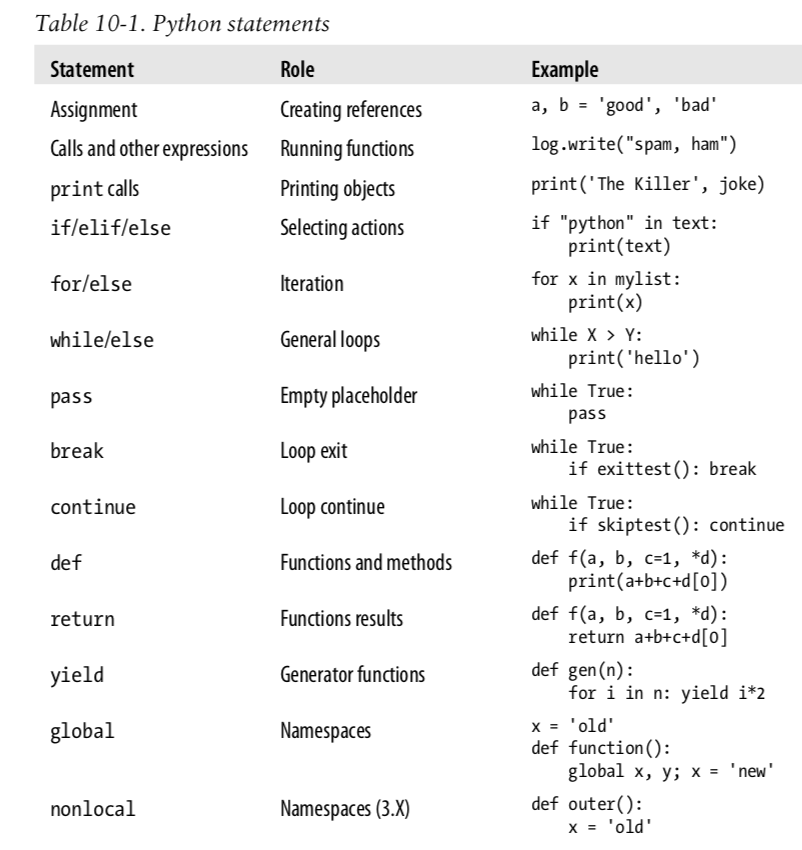

### The colon character (:)

The one new syntax component in Python is the colon character (:). All Python com- pound statements—statements that have other statements nested inside them—follow the same general pattern of a header line terminated in a colon, followed by a nested block of code usually indented underneath the header line, like this:

### Paranthesis are optional

### End of line is end statement

In [ ]:
x = 1;

In [ ]:
x = 1

### End of indentation is end of block

You don't need to include ``begin/end``, ``then/endif``, or braces around the nested block, as you do in C-like languages:

Instead, in Python, we consistently indent all the statements in a given single nested block the same distance to the right, and Python uses the statements’ physical inden- tation to determine where the block starts and stops:

Python doesn’t care how you indent (you may use either spaces or tabs), or how much you indent (you may use any number of spaces or tabs). In fact, the indentation of one nested block can be totally different from that of another. The syntax rule is only that for a given single nested block, all of its statements must be indented the same distance to the right. 

The indentation rule is one of the main ways the Python almost forces programmers to produce uniform, regular, and readable code.

### Statement Rule Special Cases

It is possible to squeeze more than one statement onto a single line in Python by separating them with semicolons:

In [ ]:
a = 1; b = 2; print(a + b) # Three statements on one line

Compound statements like if tests and while loops must still appear on lines of their own.

The other special rule for statements is essentially the inverse: you can make a single statement span across *multiple lines*. 

To make this work, you simply have to enclose part of your statement in a bracketed pair—parentheses (()), square brackets ([]), or curly braces ({}). 

For instance, to continue a list literal:

In [ ]:
mylist = [1111,
          2222,
          3333]

The body of a compound statement can appear on the same line as the header in Python, after the colon:

## A Simple Interactive Loop

Suppose you need to write a classic read/evaluate/print loop program.

In [ ]:
while True:
    reply = input('Enter text:')
    if reply == 'stop': break
    print(reply.upper())

Now suppose that instead of converting a text string to uppercase, we want to do some math with numeric input—squaring it.

In [ ]:
while True:
    reply = input('Enter text:') 
    if reply == 'stop': break 
    print(int(reply) ** 2)
print('Bye')

what happens when the input is invalid?

In [ ]:
while True:
    reply = input('Enter a number or stop:') 
    if reply == 'stop': 
        break
    elif not reply.isdigit():
        print('Bad!' * 8) 
    else:
        print(int(reply) ** 2) 
print('Bye')

## Handling Errors with try Statements

The most general way to handle errors in Python is to catch and recover from them completely using the Python try statement.

In [ ]:
while True:
    reply = input('Enter text:') 
    if reply == 'stop': 
        break 
    try:
        num = int(reply) 
    except:
        print('Bad!' * 8) 
    else:
        print(num ** 2) 
print('Bye')

This version works exactly like the previous one, but we’ve replaced the explicit error check with code that assumes the conversion will work and wraps it in an exception handler for cases when it doesn’t.

In terms of statement nesting, because the words ``try``, ``except``, and ``else`` are all indented to the same level, they are all considered part of the same single try statement. Notice that the else part is associated with the ``try`` here, not the ``if``. 

## Nesting Code Three Levels Deep

Nesting can take us even further if we need it to.

In [ ]:
while True:
    reply = input('Enter text:') 
    if reply == 'stop':
        break
    elif not reply.isdigit():
        print('Bad!' * 8) 
    else:
        num = int(reply) 
        if num < 20:
            print('low') 
        else:
            print(num ** 2) 
print('Bye')

## Assignment Statement Forms

The following table illustrates the different assignment statement forms in Python, and their syntax patterns.

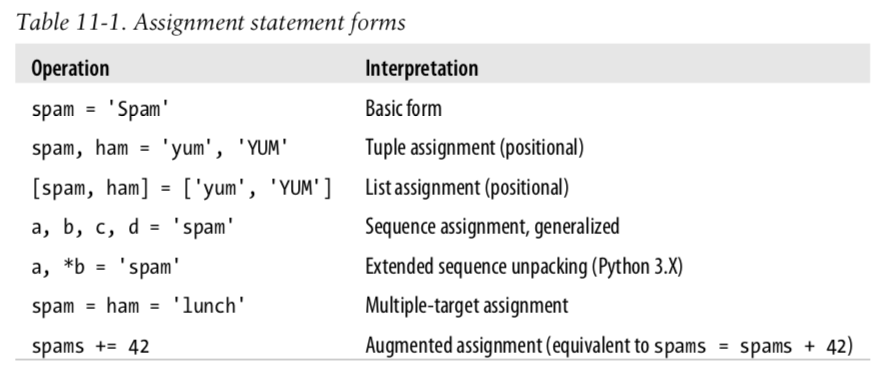

In [ ]:
a, b, c, d, e = "Kevin"

In [ ]:
a

In [ ]:
b

In [ ]:
c

In [ ]:
d

In [ ]:
e

In [ ]:
a, *b = "Kevin"

In [ ]:
a

In [ ]:
b

## Augmented Assignments

Known as augmented assignments, and borrowed from the C language, these formats are mostly just shorthand. They imply the combination of a binary expression and an assignment. For instance, the following two formats are roughly equivalent:

Table 11-2. Augmented assignment statements
X += Y      X &= Y     X −= Y     X |= Y
X *= Y      X ^= Y     X /= Y     X >>= Y
X %= Y      X <<= Y    X **= Y    X //= Y

Augmented assignments have three advantages:
* There’s less for you to type. Need I say more?
* Theleftsidehastobeevaluatedonlyonce.In ``X += Y``,``X`` may be a complicated object expression. In the augmented form, its code must be run only once. However, in the long form, ``X = X + Y``, ``X`` appears twice and must be run twice. Because of this, augmented assignments usually run faster.
* The optimal technique is automatically chosen. That is, for objects that support in-place changes, the augmented forms automatically perform in-place change operations instead of slower copies.

## Variable Name Rules

In Python, names come into existence when you assign values to them, but there are a few rules to follow when choosing names for the subjects of your programs:

* Syntax: (underscore or letter) + (any number of letters, digits, or underscores)

* Case matters: SPAM is not the same as spam

* Reserved words are off-limits

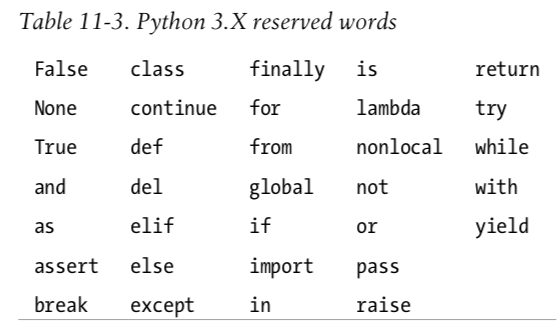

# if Tests and Syntax Rules

The general form of an ``if`` statement looks like this:

All parts are optional, except the initial ``if`` tests.

In [ ]:
if 1:
    print('true')

To handle a false result, code the ``else``

In [ ]:
if not 1:
    print('true')
else:
    print('false')

Here is an example of a more complex ``if`` statement:

In [ ]:
x = 'killer rabbit'

if x == 'roger':
    print("shave and haircut")
elif x == 'bugs':
    print("what's up doc?")
else:
    print("Run away! Run away!")

In [ ]:
choice = 'ham'

if choice == 'spam':
    print(1.25)
elif choice == 'ham':
    print(1.99)
elif choice == 'eggs':
    print(0.99)
elif choice == 'bacon':
    print(1.10)
else:
    print('Bad choice')

Can we do this without ``if statements``?

In [ ]:
menu = {'spam': 1.25, 'ham': 1.99, 'eggs': 0.99, 'bacon': 1.10}

choice = 'ham'
print(menu[choice])

Use ``get`` method calls?

In [ ]:
menu.get?

In [ ]:
choice = "apple"
menu.get(choice, "Bad choice")

Test using ``in`` membership?

In [ ]:
choice = "ham"

if choice in menu:
    print(menu[choice])
else:
    print("Bad choice")

Test using ``try``?

In [ ]:
choice = 'apple juice'
try:
    print(menu[choice])
except:
    print("Bad choice")

In [ ]:
choice = 'apple juice'
print(menu[choice])

### Python Syntax Revisited

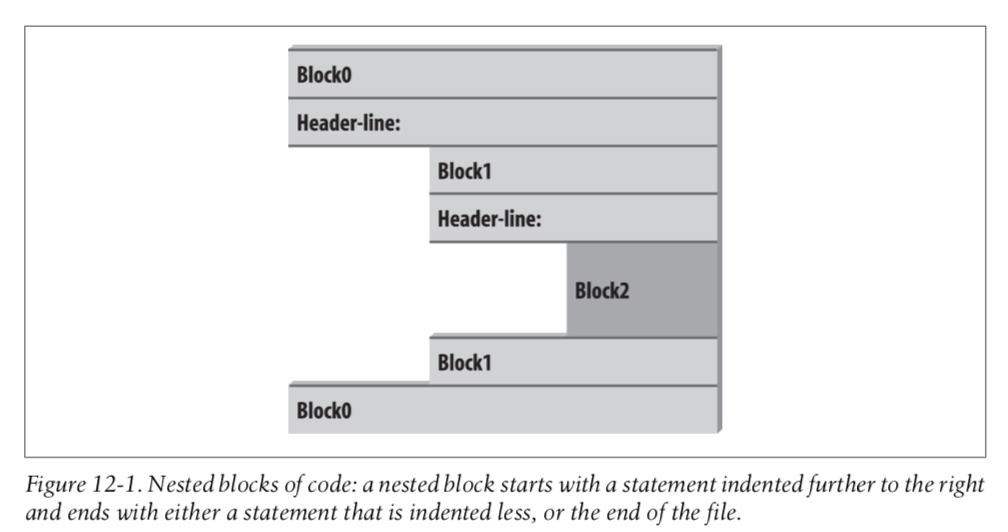

In [ ]:
x = 1 
if x:
    y= 2 
    if y:
        print('block2') 
    print('block1')
print('block0')

Numbers are True in Python if they are not zero

One rule of thumb: although you can use spaces or tabs to indent, it’s usually not a good idea to mix the two within a block—use one or the other. Technically, tabs count for enough spaces to move the current column number up to a multiple of 8, and your code will work if you mix tabs and spaces consistently. However, such code can be difficult to change. Worse, mixing tabs and spaces makes your code difficult to read completely apart from Python’s syntax rules.

![tabs_vs_spaces](https://media.giphy.com/media/l0IylSajlbPRFxH8Y/giphy.gif "tabs_vs_spaces")

## The if/else Ternary Expression

In [ ]:
X = 10

if X:
    A = Y
else:
    A = Z

In [ ]:
Y

In [ ]:
A

You can write the same thing in one expression:

In [ ]:
X

In [ ]:
Y = 5
Z = 7
A = Y if X else Z
print(A)

In [ ]:
A = 't' if 'ok' else 'f'
print(A)

Non-empty string and non-empty list are True

In [ ]:
A = 't' if '' else 'f'
print(A)

In [ ]:
my_check = ''

if my_check:
    A = 't'
else:
    A = 'f'
    
print(A)

## While Loops

while False:
    print('Type CTRL-C to stop me!')

In [ ]:
x = 'spam'
while x:
    print(x, end=' ')
    x = x[1:]

In [ ]:
a = 0; b = 10

while a < b:
    print(a, end=' ')
    a += 1

## break, continue, pass, and the Loop else

* **break**: Jumps out of the closest enclosing loop (past the entire loop statement)
* **continue**: Jumps to the top of the closest enclosing loop (to the loop’s header line)
* **pass**: Does nothing at all: it’s an empty statement placeholder
* **Loop else block**: Runs if and only if the loop is exited normally (i.e., without hitting a break)

### pass

The ``pass`` statement is a no-operation placeholder that is used when the syntax requires a statement, but you have nothing useful to say.

In [ ]:
def my_function():
    pass # fill this later

### continue

In [ ]:
# x = 9 cond is valid 
# x = 8 cond is not valied - print
# x = 7 cond is valid
# x = 6 cond is not valied - print

x = 10 

while x:
    x = x-1
    if x % 2 != 0: continue 
    print(x, end=' ')

### break

In [ ]:
while True:
    name = input('Enter Name: ')
    if name == 'stop': break
    age = input('Enter age: ')
    print('Hello', name, '=>', int(age) ** 2)

In [ ]:
n=5
while (n>0):
    n=n-1
    if n==2:
        break
    print (n)
print("loop is finished")

In [ ]:
n=5
while (n>0):
    n=n-1
    if n==2:
        continue
    print (n)
print("loop is finished")

### Loop else

In [ ]:
print(type(21 // 2))
print(21 // 2)

In [ ]:
y = 13
x = y // 2 

while x > 1:
    if y % x == 0:
        print(y, 'has factor', x) 
        break #break will exit the loop including else statment
    x -= 1 
else:
    print(y, 'is prime')

In [ ]:
21//2

## for Loops

The ``for`` loop is a generic iterator in Python: it can step through the items in any ordered sequence or other iterable object. The ``for`` statement works on strings, lists, tuples, and other built-in iterables, as well as new user-defined objects that we’ll learn how to create later with classes. 

The ``for`` statement also supports an optional else block, which works exactly as it does in a ``while`` loop. The ``break`` and ``continue`` statements introduced earlier also work the same in a ``for`` loop as they do in a ``while``. The ``for`` loop’s complete format can be described this way:

In [ ]:
for x in ["spam", "eggs", "ham"]:
    print(x, end=' ')

In [ ]:
for x in "spam":
    print(x, end=" ")

In [ ]:
for x in ["spam", "eggs", "ham"]:
    print(x, end=" ")
    for y in x:
        print(y, end=' ')

In [ ]:
x

In [ ]:
for z in x:
    print(z)

In [ ]:
total = 0

for x in [1, 2, 3, 4]:
    total += x

In [ ]:
print(total)

In [ ]:
prod = 1

for item in [1, 2, 3, 4]:
    prod *= item
    
print(prod)

In [ ]:
examplelist = [1,2,3,4,5]
y=3
for x in examplelist:
    if x==y:
        print ("matched", x)
        break #will exit the entire loop including its else statment
else:
    print ("no match found")
    


### Other data types

In [ ]:
S = "lumberjack"
T = ("and", "I'm", "okay")

In [ ]:
for x in S:
    print(x, end=' ')

In [ ]:
for x in T:
    print(x, end=' ')

In [ ]:
T = [(1, 2), (3, 4), (5, 6)]

for (a, b) in T:
    print(a, b)

In [ ]:
D = {'a': 1, 'b': 2, 'c': 3}

In [ ]:
for i in D:
    print(i, "=>", D[i])

In [ ]:
D.items?

In [ ]:
list(D.items())

In [ ]:
for (key, value) in D.items():
    print(key, "=>", value)

In [ ]:
T

In [ ]:
for both in T:
    a, b = both
    print(a, b)